In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import os

In [2]:
# loading data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

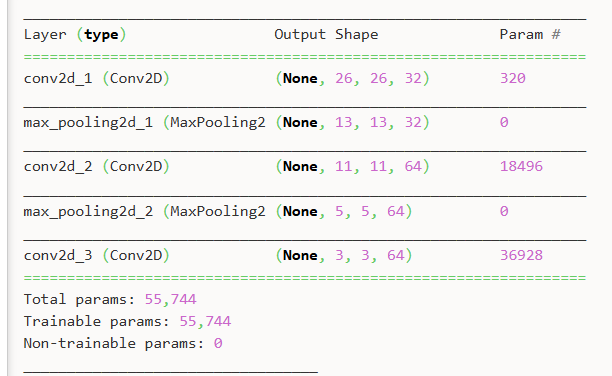


In [3]:
IMG_H = 28
IMG_W = 28
IMG_CHANNELS = 1

train_images.reshape((60000, IMG_H, IMG_W, IMG_CHANNELS))
test_images.reshape((10000, IMG_H, IMG_W, IMG_CHANNELS))

model_psy_koty = models.Sequential()
filter_size = 3
model_psy_koty.add(layers.Conv2D(32, (filter_size, filter_size), activation='relu', input_shape=(IMG_H, IMG_W, IMG_CHANNELS)))
model_psy_koty.add(layers.MaxPooling2D((2, 2)))
model_psy_koty.add(layers.Conv2D(64, (filter_size, filter_size), activation='relu', input_shape=(13, 13, 64)))
model_psy_koty.add(layers.MaxPooling2D((2, 2)))
model_psy_koty.add(layers.Conv2D(64, (filter_size, filter_size), activation='relu', input_shape=(5, 5, 64)))

model_psy_koty.add(layers.Flatten())
model_psy_koty.add(layers.Dense(64, activation='relu'))
model_psy_koty.add(layers.Dense(10, activation='softmax'))


d:\programowanie\Python\ML2\ml_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model_psy_koty.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
model_psy_koty.fit(train_images, train_labels, batch_size=64, epochs=5)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8477 - loss: 1.3346
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9812 - loss: 0.0638
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9879 - loss: 0.0412
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9907 - loss: 0.0327
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9920 - loss: 0.0296


In [19]:
import os
import shutil
import random

base_dir = "dataset_cats_dogs"
cat_dir = os.path.join(base_dir, "cats")
dog_dir = os.path.join(base_dir, "dogs")

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

for category in ["cats", "dogs"]:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

def split_data(source_dir, train_dest, validation_dest, test_dest, train_size=1000, val_size=500):
    files = os.listdir(source_dir)
    random.shuffle(files)  # Shuffle to ensure randomness

    train_files = files[:train_size]
    validation_files = files[train_size:train_size+val_size]
    test_files = files[train_size+val_size:]
    

    for file in train_files:
        shutil.move(os.path.join(source_dir, file), os.path.join(train_dest, file))
        
    for file in validation_files:
        shutil.move(os.path.join(source_dir, file), os.path.join(validation_dest, file))

    for file in test_files:
        shutil.move(os.path.join(source_dir, file), os.path.join(test_dest, file))
    
    shutil.rmtree(source_dir)

# Move data
split_data(cat_dir, os.path.join(train_dir, "cats"), os.path.join(val_dir, "cats"), os.path.join(test_dir, "cats"))
split_data(dog_dir, os.path.join(train_dir, "dogs"), os.path.join(val_dir, "dogs"), os.path.join(test_dir, "dogs"))

FileNotFoundError: [WinError 3] System nie może odnaleźć określonej ścieżki: 'dataset_cats_dogs\\cats'

In [20]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory
 
train_dataset = image_dataset_from_directory(
    train_dir,  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=False,
)

val_dataset = image_dataset_from_directory(
    val_dir,  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=False,
)

test_dataset = image_dataset_from_directory(
    test_dir,  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=False,
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


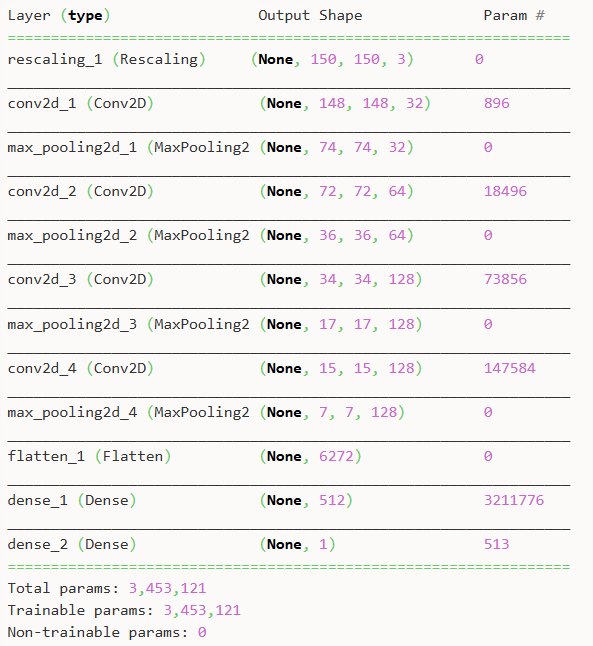

In [ ]:
model_psy_koty2 = models.Sequential()

model_psy_koty2.add(layers.Rescaling(1/255, input_shape=(150, 150, 3)))
model_psy_koty2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_psy_koty2.add(layers.MaxPooling2D((2, 2)))
model_psy_koty2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_psy_koty2.add(layers.MaxPooling2D((2, 2)))
model_psy_koty2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_psy_koty2.add(layers.MaxPooling2D((2, 2)))
model_psy_koty2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_psy_koty2.add(layers.MaxPooling2D((2, 2)))
model_psy_koty2.add(layers.Flatten())
model_psy_koty2.add(layers.Dense(512, activation='relu'))
model_psy_koty2.add(layers.Dense(1, activation='sigmoid'))

model_psy_koty2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_psy_koty2.summary()

d:\programowanie\Python\ML2\ml_env\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model_psy_koty2.fit(train_dataset, epochs=30, batch_size=20, validation_data=val_dataset)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 276ms/step - accuracy: 0.9416 - loss: 9413.3125 - val_accuracy: 0.5000 - val_loss: 6671.9648
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 237ms/step - accuracy: 0.9416 - loss: 1344.5201 - val_accuracy: 0.5000 - val_loss: 3003.0134
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.9416 - loss: 332.7380 - val_accuracy: 0.5000 - val_loss: 1553.9023
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 235ms/step - accuracy: 0.9416 - loss: 189.7538 - val_accuracy: 0.5000 - val_loss: 1269.0031
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - accuracy: 0.9125 - loss: 163.1656 - val_accuracy: 0.5000 - val_loss: 305.3625
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 230ms/step - accuracy: 0.9416 - loss: 37.0519 - val_accuracy: 0.5000 - val_loss: 330.9817
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 267ms/step - accuracy: 0.9416 - loss: 36.1105 - val_accuracy: 0.5000 - val_loss: 60.6555
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 267ms/st

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


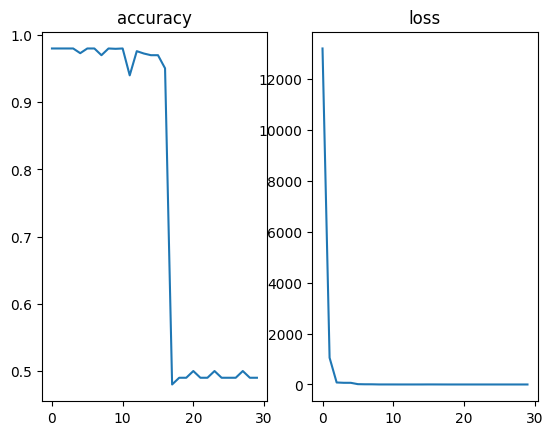

In [11]:
history_dict = history.history
print(history_dict.keys())

fig, ax = plt.subplots(1, 2)
ax[0].plot(history_dict['accuracy'])
ax[0].set_title('accuracy')
ax[1].plot(history_dict['loss'])
ax[1].set_title('loss')
plt.show()

# Lab 4

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Create data augmentation as a separate model
# data_augmentation = models.Sequential(
#     [
#         layers.RandomFlip("horizontal"),
#         layers.RandomRotation(factor=0.5),
#         layers.RandomZoom(height_factor=0.2),
#         layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
#     ]
# )

# data_augmentation.training = True
 
# # Nest data augmentation model as a layer
 
# model_aug = models.Sequential()
# model_aug.add(data_augmentation)
# model_aug.add(layers.Rescaling(255, input_shape=(150, 150, 3)))
# model_aug.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model_aug.add(layers.MaxPooling2D((2, 2)))
# model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_aug.add(layers.MaxPooling2D((2, 2)))
# model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_aug.add(layers.MaxPooling2D((2, 2)))
# model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_aug.add(layers.MaxPooling2D((2, 2)))
# model_aug.add(layers.Flatten())
# model_aug.add(layers.Dense(512, activation='relu'))
# model_aug.add(layers.Dense(1, activation='sigmoid'))



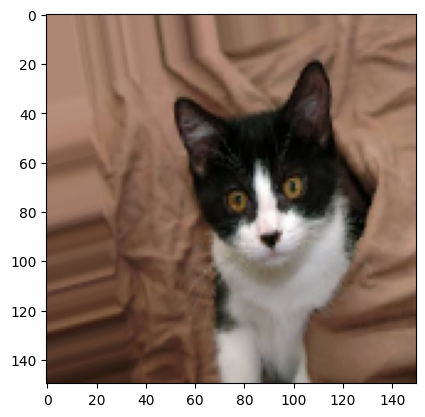

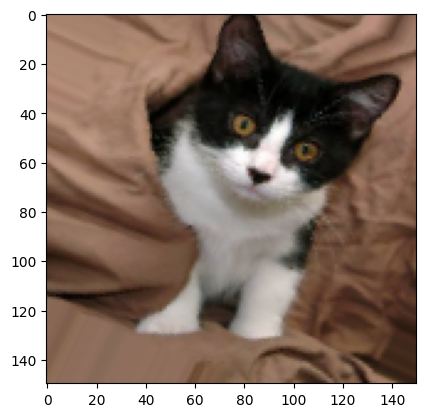

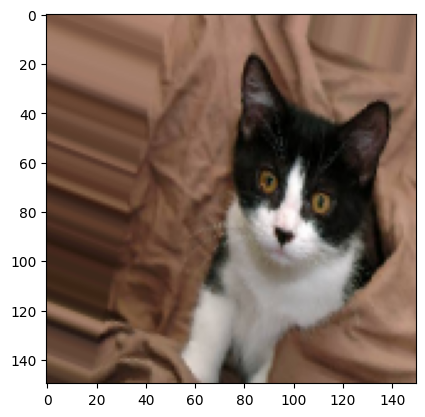

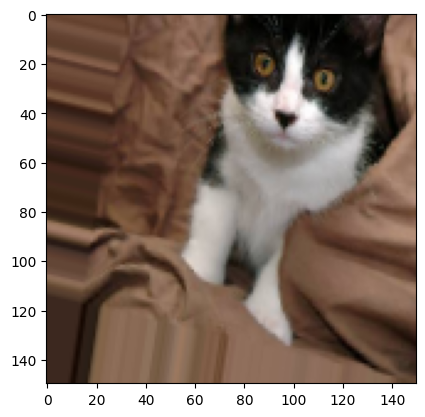

In [ ]:
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt

train_cats_dir = os.path.join(train_dir, "cats")

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
 
# We pick one image to "augment"
img_path = fnames[3]
 
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
 
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
 
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
 
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
 
plt.show()

In [26]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        # Set target directory:
        train_dir,
        # Resize images to 150x150 pixels:
        target_size=(50, 50),
        # Experiment with different batches:
        batch_size=20,
        # Labels needed for binary_crossentropy loss:
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='binary')

model_aug = models.Sequential()

model_aug.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(512, activation='relu'))
model_aug.add(layers.Dense(1, activation='sigmoid'))

model_aug.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_aug.summary()
 
history = model_aug.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

d:\programowanie\Python\ML2\ml_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 258ms/step - accuracy: 0.5222 - loss: 0.7200 - val_accuracy: 0.5020 - val_loss: 0.6927
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 251ms/step - accuracy: 0.5341 - loss: 0.6917 - val_accuracy: 0.5980 - val_loss: 0.6735
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 256ms/step - accuracy: 0.5933 - loss: 0.6791 - val_accuracy: 0.6620 - val_loss: 0.6440
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.6443 - loss: 0.6414 - val_accuracy: 0.6440 - val_loss: 0.6318
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - accuracy: 0.6322 - loss: 0.6607 - val_accuracy: 0.6180 - val_loss: 0.6298
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.6414 - loss: 0.6426 - val_accuracy: 0.6430 - val_loss: 0.6310
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - accuracy: 0.6423 - loss: 0.6208 - val_accuracy: 0.6340 - val_loss: 0.6364
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - accuracy: 0.6848 -

KeyboardInterrupt: 

In [ ]:
history_dict = history.history
print(history_dict.keys())

fig, ax = plt.subplots(1, 2)
ax[0].plot(history_dict['accuracy'])
ax[0].set_title('accuracy')
ax[1].plot(history_dict['loss'])
ax[1].set_title('loss')
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        # Set target directory:
        train_dir,
        # Resize images to 150x150 pixels:
        target_size=(150, 150),
        # Experiment with different batches:
        batch_size=20,
        # Labels needed for binary_crossentropy loss:
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model_dropout = models.Sequential()

model_dropout.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Flatten())
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(512, activation='relu'))
model_dropout.add(layers.Dense(1, activation='sigmoid'))

model_dropout.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_dropout.summary()
 
history = model_dropout.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
history_dict = history.history
print(history_dict.keys())

fig, ax = plt.subplots(1, 2)
ax[0].plot(history_dict['accuracy'])
ax[0].set_title('accuracy')
ax[1].plot(history_dict['loss'])
ax[1].set_title('loss')
plt.show()